# Exploratory Data Analysis

Before we enter data into machine learning models, we first want to analyse our data to detect mistakes and explore relationships between different variables.

### Univariate EDA

Before we analyze the relationship between variables, we have to look at the single variable itself. For categorical variables, the only useful tool is the frequency table, where we analyze the frequency of each value of a variable.

In [ ]:
import pandas as pd

freq_table = pd.crosstab("index or column values", "frequency")

For quantitative data, there are many ways to analyze data. Using histograms and box plots, it follows that we can look at a variable's central tendency, spread, skewness, and kurtosis, and other useful information that we can use.

There are a couple of useful measures of central tendencies such as the mean, the median, and the mode. The mean is simply the average of all the samples, where we can use sample means to find the distribution of the variable. The median is the 'middle' number in the dataset. It follows that the mean and the median are the same for perfectly symmetric distributions, however when the distribution is skewed, it follows that the mean would usually be towards the tail of the distribution, while the median would be closer to the peak. Therefore, in situations where the distribution is skewed, the median might be a better representation of the central tendency. In addition, the median is robust, meaning that any drastic changes to the values of the dataset will not affect the median as much as the mean. Lastly, the mode determines the most frequent value of the variable, and can determine if the distribution is unimodal or multimodal, which can determine transformations we can perform on the dataset.

To look at a variables spread, it follows that we can calculate the standard deviation, the variance, and also the interquartile range, which is the difference between the third quartile and the first quartile. We can also look at its skewness and kurtosis, which is the assymetry of the variable's distribution and the peakness of the tail of the distribution, respectively.

There are many ways to graph a variable's distribution, the most common being a histogram. There is also the box plot, which graphs the values of the median, the 3rd quartile and the 1st quartile, in addition with the minimum and the maximum of the variable. This graphing tool is useful to measure the variance of the distribution as well as the skewness and outliers of the distribution.

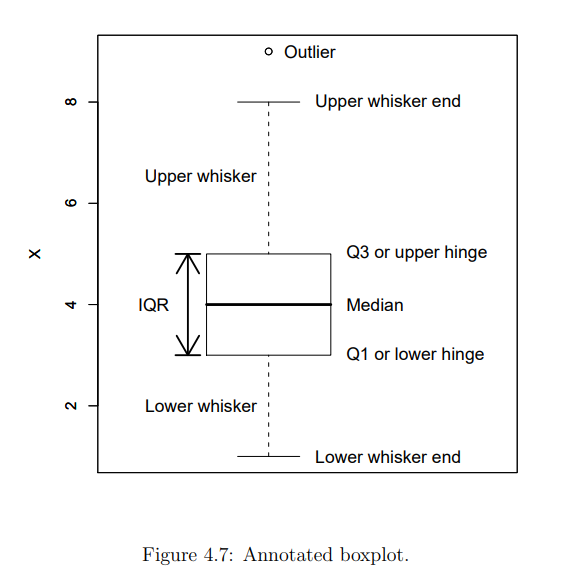

mean :  69.05905545622907
var  :  1548.0940216806857
skew :  -0.008035121482834333
kurt :  -0.08847112614373565


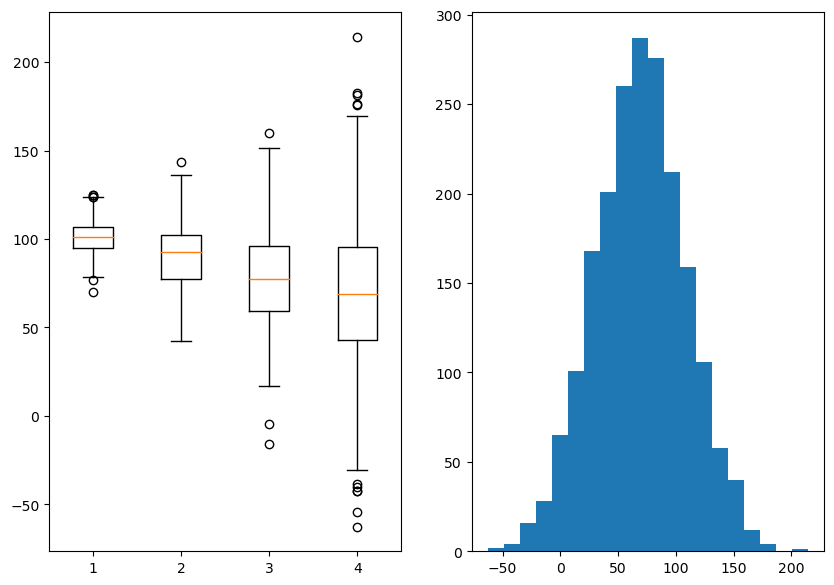

In [13]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import kurtosis, skew

np.random.seed(10)
 
data_1 = np.random.normal(100, 10, 200)
data_2 = np.random.normal(90, 20, 200)
data_3 = np.random.normal(80, 30, 200)
data_4 = np.random.normal(70, 40, 2000)
data = [data_1, data_2, data_3, data_4]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
#ax = fig.add_axes([0, 0, 1, 1])

print("mean : ", np.mean(data_4))
print("var  : ", np.var(data_4))
print("skew : ", skew(data_4))
print("kurt : ", kurtosis(data_4))
 
# Creating plot
plt.subplot(121)
plt.boxplot(data)
plt.subplot(122)
plt.hist(data_4, bins=20)

# show plot
plt.show()

We can compare the distribution of the given variable with a normal distribution using a quantile-quantile plot. The qq-plot is a graph that compares the values of a normal distribution and the values of the actual distribution. A normal distribution in a qq-plot would be represented by a straight diagonal line in the graph, and we compare the variable distribution with the diagonal line. If the distribution is always on the diagonal line, then it means that our variable has a normal distribution, while if the distribution does not follow the line, then it does not follow the normal distribution.

((array([-3.39232293, -3.14126578, -3.00201262, ...,  3.00201262,
          3.14126578,  3.39232293]),
  array([-62.70676209, -54.50579774, -42.60245231, ..., 181.72663047,
         182.78087995, 214.3664283 ])),
 (39.395880802178056, 69.05905545622907, 0.9997613384334112))

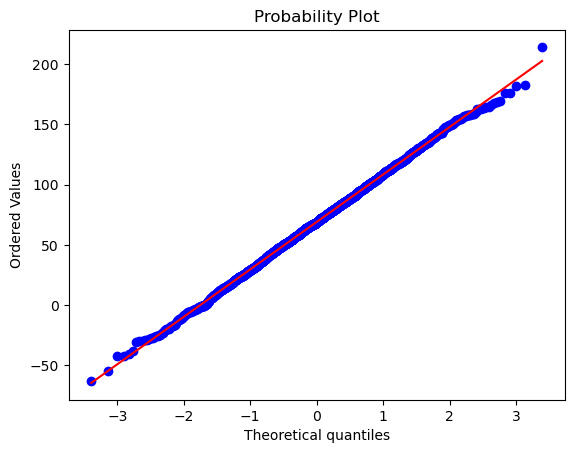

In [14]:
import scipy.stats as stats
stats.probplot(data_4, dist="norm", plot=plt)

A way to compare the linear relationship between two quantitative variables is to use the correlation matrix, which ranges from -1(a negative relationship) to 1(a positive relationship), where a correlation of 0 implies no correlation(not necessarily independence). There are a couple of methods of correlation. Pearson's correlation indicate the strength and direction of the linear relationship, while Spearman's correlation indicate the strength and direction of the monotonic relationship between the two variables. Thus, Pearson's correlation should be used to detect linearity, while Spearman's correlation should be used to detect any sort of general trend. It is a good idea to examine both methods.

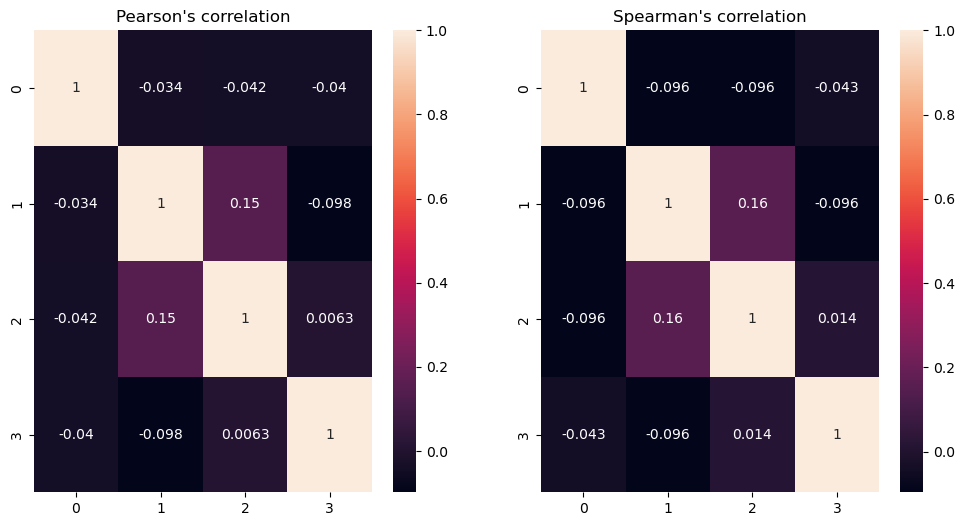

In [32]:
import seaborn as sns

data = pd.DataFrame([data_1, data_2, data_3, data_4])
data = data.transpose()
data = data.rename(columns={0: '0', 1: '1'})
matrix = data.corr(method='pearson')
matrix_1 = data.corr(method='spearman')
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title("Pearson's correlation")
sns.heatmap(matrix, annot=True)
plt.subplot(122)
plt.title("Spearman's correlation")
sns.heatmap(matrix_1, annot=True)
plt.show()

A way to compare a categorical variable and a quantitative variable is to compare them in terms of the categorical values(conditioning). We can graphically compare them with side-by-side box plots, where each box plot represents the data or the quantitative variable given a different categorical variable value. 

To compare two quantitative variables, we plot a scatter plot that graphs one variable with respect to another variable. We do this to graphically and visually see the correlation or the relationship between two variables. Generally, if one of the variables is the outcome or target variable, then we plot the target variable on the y-axis. 

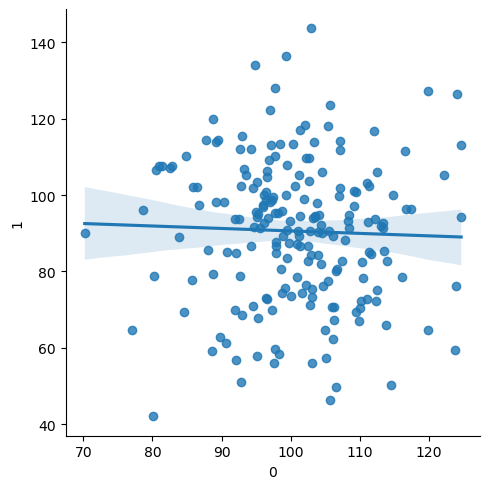

In [33]:
sns.lmplot(data=data, x='0', y='1')
plt.show()